In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wine-reviews/winemag-data-130k-v2.json
/kaggle/input/wine-reviews/winemag-data_first150k.csv
/kaggle/input/wine-reviews/winemag-data-130k-v2.csv


In [2]:
df = pd.read_csv("/kaggle/input/wine-reviews/winemag-data_first150k.csv")

In [3]:
df

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
...,...,...,...,...,...,...,...,...,...,...,...
150925,150925,Italy,Many people feel Fiano represents southern Ita...,NaN,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Feudi di San Gregorio
150926,150926,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,91,27.0,Champagne,Champagne,NaN,Champagne Blend,H.Germain
150927,150927,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Terredora
150928,150928,France,"A perfect salmon shade, with scents of peaches...",Grand Brut Rosé,90,52.0,Champagne,Champagne,NaN,Champagne Blend,Gosset


In [4]:
df.columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'variety', 'winery'],
      dtype='object')

In [7]:
df = df.drop(['Unnamed: 0', 'country', 'designation',
       'price', 'province', 'region_1', 'region_2', 'variety', 'winery'],axis = 1)

In [8]:
df

,description,points
0,This tremendous 100% varietal wine hails from ...,96
1,"Ripe aromas of fig, blackberry and cassis are ...",96
2,Mac Watson honors the memory of a wine once ma...,96
3,"This spent 20 months in 30% new French oak, an...",96
4,"This is the top wine from La Bégude, named aft...",95
...,...,...
150925,Many people feel Fiano represents southern Ita...,91
150926,"Offers an intriguing nose with ginger, lime an...",91
150927,This classic example comes from a cru vineyard...,91
150928,"A perfect salmon shade, with scents of peaches...",90


In [9]:
df.points.value_counts()

87     20747
88     17871
90     15973
86     15573
89     12921
85     12411
84     10708
91     10536
92      9241
83      6048
93      6017
82      4041
94      3462
95      1716
81      1502
80       898
96       695
97       365
98       131
99        50
100       24
Name: points, dtype: int64

In [11]:
def sentiment_rating(rating):
    
    if(int(rating) < 90):
        return 0
    else: 
        return 1
df.points = df.points.apply(sentiment_rating)

In [12]:
df

,description,points
0,This tremendous 100% varietal wine hails from ...,1
1,"Ripe aromas of fig, blackberry and cassis are ...",1
2,Mac Watson honors the memory of a wine once ma...,1
3,"This spent 20 months in 30% new French oak, an...",1
4,"This is the top wine from La Bégude, named aft...",1
...,...,...
150925,Many people feel Fiano represents southern Ita...,1
150926,"Offers an intriguing nose with ginger, lime an...",1
150927,This classic example comes from a cru vineyard...,1
150928,"A perfect salmon shade, with scents of peaches...",1


In [13]:
df.points.value_counts()

0    102720
1     48210
Name: points, dtype: int64

In [14]:
df.columns = ['Review','Liked']

In [15]:
df.head()

,Review,Liked
0,This tremendous 100% varietal wine hails from ...,1
1,"Ripe aromas of fig, blackberry and cassis are ...",1
2,Mac Watson honors the memory of a wine once ma...,1
3,"This spent 20 months in 30% new French oak, an...",1
4,"This is the top wine from La Bégude, named aft...",1


In [16]:
X=df.Review.astype('str')
y=df.Liked

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [18]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
vocab=1000
tokenizer=Tokenizer(vocab,oov_token="<oov>")
tokenizer.fit_on_texts(X_train)
train_sequence=tokenizer.texts_to_sequences(X_train)
test_sequence=tokenizer.texts_to_sequences(X_test)
padded_train=pad_sequences(train_sequence,maxlen=500)
padded_test=pad_sequences(test_sequence,maxlen=500)

Using TensorFlow backend.


In [19]:
from keras.models import Sequential
from keras.layers import Dense,LSTM,Embedding,GlobalAveragePooling1D
from keras.optimizers import Adam

In [23]:
model=Sequential()
model.add(Embedding(vocab,1000))
model.add(GlobalAveragePooling1D())
model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer=Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 1000)        1000000   
_________________________________________________________________
global_average_pooling1d_2 ( (None, 1000)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               128128    
_________________________________________________________________
dense_7 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_8 (Dense)              (None, 512)               131584    
_________________________________________________________________
dense_9 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_10 (Dense)             (None, 128)              

In [25]:
history = model.fit(padded_train,y_train,validation_data=(padded_test,y_test),epochs=10)

Train on 120744 samples, validate on 30186 samples
Epoch 1/10
120744/120744 [==============================] - 29s 242us/step - loss: 0.3854 - accuracy: 0.8220 - val_loss: 0.3522 - val_accuracy: 0.8382
Epoch 2/10
120744/120744 [==============================] - 28s 233us/step - loss: 0.3485 - accuracy: 0.8401 - val_loss: 0.3506 - val_accuracy: 0.8421
Epoch 3/10
120744/120744 [==============================] - 28s 236us/step - loss: 0.3440 - accuracy: 0.8431 - val_loss: 0.3625 - val_accuracy: 0.8316
Epoch 4/10
120744/120744 [==============================] - 28s 231us/step - loss: 0.3390 - accuracy: 0.8440 - val_loss: 0.3473 - val_accuracy: 0.8388
Epoch 5/10
120744/120744 [==============================] - 28s 235us/step - loss: 0.3362 - accuracy: 0.8451 - val_loss: 0.3674 - val_accuracy: 0.8394
Epoch 6/10
120744/120744 [==============================] - 28s 230us/step - loss: 0.3322 - accuracy: 0.8464 - val_loss: 0.3684 - val_accuracy: 0.8302
Epoch 7/10
120744/120744 [=================

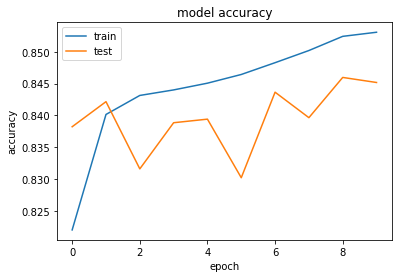

In [26]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()